In [9]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [10]:
# filename = "iq2400MHz214450.npy"
# filename = "iq2420MHz150946.npy"
filename = "iq2420MHz165020.npy"
# filename = "iq2426MHz150933.npy"

In [11]:
with open(filename, "rb") as f:
    try:
        signal = np.load(f)
        _ = np.load(f, allow_pickle=True)
        metadata = np.load(f, allow_pickle=True).item()
    except ValueError:
        print("Error: could not load data from file. Exiting.")
        exit(1)


print(signal.shape)
pprint(metadata)

(2, 6000000)
{'center_freq': 2420000000.0,
 'date_recorded': '11-06',
 'decimation': 1,
 'effective_sample_rate': 60000000.0,
 'hw_sample_rate': 60000000.0,
 'project_name': 'LnC',
 'protocol': 'unknown',
 'rec_length': 6000000,
 'sdr': 'USRPX300',
 'signal_type': 'Recorded Baseband-IQ',
 'testbed': 'queen_street_supervisor',
 'time_recorded': '165020',
 'transmitters': 'ambient',
 'use_case': 'ambient'}


In [ ]:
def real2complex(signal):
    assert signal.shape[0] == 2, "Signal must have 2 rows"
    return signal[0] + 1j*signal[1]


def spectrogram_plot(signal, metadata):
    fs = metadata.get("effective_sample_rate", 1.0)
    f, t, Sxx = spectrogram(signal, fs, nperseg=1024,
                            noverlap=512, return_onesided=False)

    # Sort the frequencies and spectrogram rows
    sorted_indices = np.argsort(f)
    f = f[sorted_indices]
    Sxx = Sxx[sorted_indices, :]

    plt.pcolormesh(t, f / 1e6, 10*np.log10(np.abs(Sxx)))
    plt.ylabel('Frequency [MHz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Power [dB]')
    plt.show()

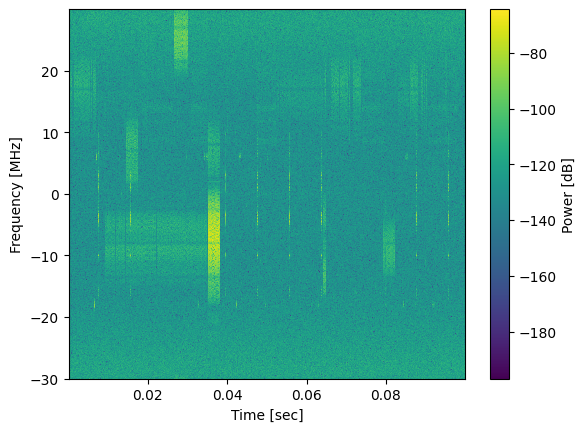

In [13]:
spectrogram_plot(real2complex(signal), metadata)

In [40]:
import pandas as pd

metadata = pd.read_csv("train_sliced_metadata.csv", index_col=0)
# update the effective_sample_rate with sample_rate if it is missing
metadata["effective_sample_rate"] = metadata["effective_sample_rate"].fillna(
    metadata["sample_rate"])
metadata

,protocol,use_case,testbed,transmitters,project_name,center_freq,rec_length,decimation,sdr,hw_sample_rate,effective_sample_rate,signal_type,date_recorded,time_recorded,author,sample_rate,packet_per_block,samples_per_packet
0,unknown,ambient,queen_street_supervisor,ambient,LnC,2.420000e+09,6000000,1,BladeRF,60000000.0,60000000.0,Recorded Baseband-IQ,11-06,150946,NaN,NaN,NaN,NaN
1,unknown,ambient,queen_street_supervisor,ambient,LnC,2.420000e+09,6000000,1,USRPX300,60000000.0,60000000.0,Recorded Baseband-IQ,11-06,165020,NaN,NaN,NaN,NaN
2,unknown,ambient,queen_street_supervisor,ambient,LnC,2.426667e+09,4000000,1,BladeRF,40000000.0,40000000.0,Recorded Baseband-IQ,11-06,150933,NaN,NaN,NaN,NaN
3,unknown,ambient,queen_street_supervisor,ambient,LnC,2.426667e+09,4000000,1,USRPX300,40000000.0,40000000.0,Recorded Baseband-IQ,11-06,165004,NaN,NaN,NaN,NaN
4,unknown,ambient,queen_street_supervisor,ambient,LnC,2.430000e+09,6000000,1,BladeRF,60000000.0,60000000.0,Recorded Baseband-IQ,11-06,150948,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Wifi-BG,upload,home,"router,UE",ENCQOR,2.437000e+03,32817504,4,ThinkRF R5550-427,125000000.0,31250000.0,Recorded,2021-12-10,5841,NaN,NaN,500.0,65504.0
551,Wifi-BG,upload,home,"router,UE",ENCQOR,2.437000e+03,32817504,4,ThinkRF R5550-427,125000000.0,31250000.0,Recorded,2021-12-10,5950,NaN,NaN,500.0,65504.0
552,Wifi-BG,upload,home,"router,UE",ENCQOR,2.437000e+03,32817504,4,ThinkRF R5550-427,125000000.0,31250000.0,Recorded,2021-12-10,10035,NaN,NaN,500.0,65504.0
553,Wifi-BG,upload,home,"router,UE",ENCQOR,2.437000e+03,32817504,4,ThinkRF R5550-427,125000000.0,31250000.0,Recorded,2021-12-10,10132,NaN,NaN,500.0,65504.0


[Text(0.5, 0, 'Center Frequency [MHz]'), Text(0, 0.5, 'Count')]

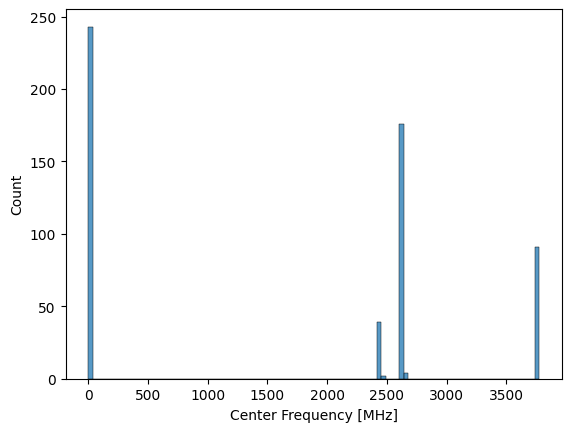

In [41]:
# analysis of center frequencies
import seaborn as sns

histplot = sns.histplot(metadata["center_freq"] / 1e6, bins=100)
histplot.set(xlabel='Center Frequency [MHz]', ylabel='Count')

[Text(0.5, 0, 'Bandwidth [MHz]'), Text(0, 0.5, 'Count')]

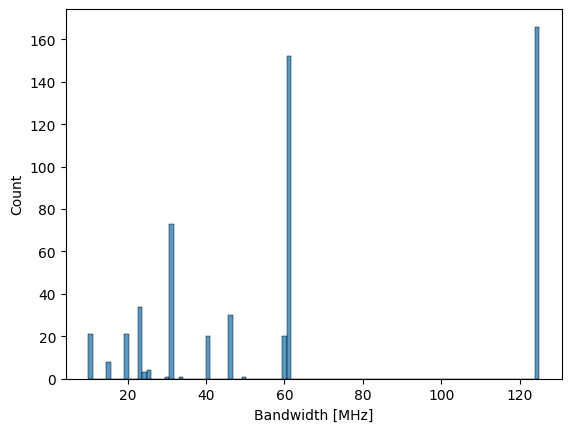

In [42]:
# analysis of the bandwidths
histplot = sns.histplot(metadata["effective_sample_rate"] / 1e6, bins=100)
histplot.set(xlabel='Bandwidth [MHz]', ylabel='Count')

In [43]:
metadata["sdr"].value_counts()

sdr
ThinkRF R5550-427    243
USRPX300             113
USRP_X310_gnodeb      91
synthetic_sdr         65
BladeRF               43
Name: count, dtype: int64

In [44]:
metadata["testbed"].value_counts()

testbed
ENCQOR                     182
queen_street               139
riaran_gnodeb               91
queen_street_supervisor     82
vlab-ambient                49
home                        12
Name: count, dtype: int64

In [45]:
metadata["project_name"].value_counts()

project_name
ENCQOR    243
none      139
RIARAN     91
LnC        82
Name: count, dtype: int64

In [46]:
metadata["protocol"].value_counts()

protocol
unknown     221
5G60        102
5G40         90
LTE          48
Wifi-AC5     35
5G20         33
Wifi-AC2     14
Wifi-BG      12
Name: count, dtype: int64